In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('population.csv', encoding='CP949', index_col=0)
df

,1975,1980,1985,1990,1995,2000,2005,2010
행정구역별(시군구),,,,,,,,
행정구역별(시군구),총인구,총인구,총인구,총인구,총인구,총인구,총인구,총인구
전국,34704286,37436315,40448486,43410899,44608726,46136101,47278951,48580293
서울특별시,6889440,8364379,9639110,10612577,10231217,9895217,9820171,9794304
부산광역시,2580472,3248232,3595405,3854960,3814325,3662884,3523582,3414950
대구광역시,1517431,1852499,2110167,2322838,2449420,2480578,2464547,2446418
인천광역시,965092,1230101,1527057,1922608,2308188,2475139,2531280,2662509
광주광역시,737283,856545,1042508,1139003,1257636,1352797,1417716,1475745
대전광역시,639585,803954,943012,1049578,1272121,1368207,1442856,1501859
울산광역시,377619,544290,669713,805355,967429,1014428,1049177,1082567


In [3]:
# 1. 전국 기준 인구 추출(행기준)
pop = df[1:2]
pop

,1975,1980,1985,1990,1995,2000,2005,2010
행정구역별(시군구),,,,,,,,
전국,34704286,37436315,40448486,43410899,44608726,46136101,47278951,48580293


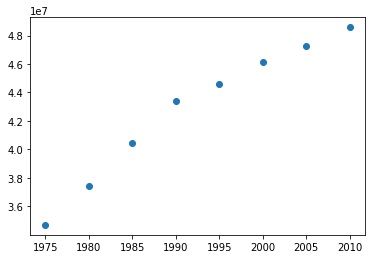

In [4]:
# 2. matplotlib.pyplot 으로 scatter plot 그래프 그리기
x = pop.columns.tolist()
y = pop.values.tolist()
plt.scatter(x, y)

In [5]:
y1 = y[0][:]
y1

['34704286',
 '37436315',
 '40448486',
 '43410899',
 '44608726',
 '46136101',
 '47278951',
 '48580293']

In [6]:
# 3. 평균 인구 증가율
lst = []
increase = 0
for i in range(len(y1)-1,0,-1) :
    increase = (int(y1[i]) - int(y1[i-1]))/int(y1[i-1])*100
    lst.append(increase)
    
lst

[2.7524764667473267,
 2.477127401814904,
 3.4239377291339816,
 2.7592771114922083,
 7.323915659043456,
 8.046120458170094,
 7.87231006567892]

In [7]:
np.mean(lst)

4.950737841725841

In [8]:
# 4. 선형회귀 기울기와 y절편 구하기
# http://hleecaster.com/ml-linear-regression-example/
# https://woowabros.github.io/study/2018/08/01/linear_regression_qr.html

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
pop1 = pop.transpose().reset_index().rename(columns={'index':'year', '전국':'population'})
pop1

행정구역별(시군구),year,population
0,1975,34704286
1,1980,37436315
2,1985,40448486
3,1990,43410899
4,1995,44608726
5,2000,46136101
6,2005,47278951
7,2010,48580293


In [11]:
x_train = pop1['year']
y_train = pop1['population']

In [12]:
lr = LinearRegression().fit(x_train.values.reshape(-1,1), y_train)

In [13]:
# 기울기
lr.coef_

array([391918.81190476])

In [14]:
# y절편
lr.intercept_

-738072725.5952384

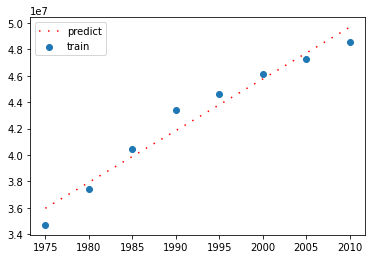

In [15]:
plt.scatter(x, y, label='train')
plt.plot(x_train, lr.predict(x_train.values.reshape(-1,1)), dashes=[1,5], color='red', label='predict')
plt.legend()

In [16]:
lr.predict(np.array([[2017],[2018],[2019],[2020],[2021]]))

array([52427518.01666665, 52819436.82857144, 53211355.64047611,
       53603274.4523809 , 53995193.26428568])

In [17]:
# 5. 딥러닝 회귀

In [18]:
import tensorflow as tf
import random

In [19]:
X_train = pop1['year'].astype('float32').tolist()
Y_train = pop1['population'].astype('float32').tolist()

In [20]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

def compute_loss():
    y_pred = a* X_train + b
    loss = tf.reduce_mean((Y_train - y_pred)**2)
    return loss

optimizer = tf.optimizers.Adam(lr=1000000)

for i in range(500000):
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 10000 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

99 a: 24754.43 b: 20549.617 loss: 61031343000000.0
10099 a: 23545.428 b: -4026334.2 loss: 18664480000000.0
20099 a: 25709.527 b: -8378163.5 loss: 18452438000000.0
30099 a: 27969.037 b: -12699014.0 loss: 18276917000000.0
40099 a: 30033.79 b: -16993156.0 loss: 18039253000000.0
50099 a: 25963.527 b: -21264276.0 loss: 171134250000000.0
60099 a: 34301.92 b: -25497222.0 loss: 17636205000000.0
70099 a: 36426.973 b: -29731948.0 loss: 17437289000000.0
80099 a: 38569.742 b: -33946570.0 loss: 17243480000000.0
90099 a: 40618.53 b: -38119330.0 loss: 17048056000000.0
100099 a: 42504.45 b: -42266840.0 loss: 17036244000000.0
110099 a: 130082.164 b: -46304324.0 loss: 2.8929873e+16
120099 a: 46920.184 b: -50488612.0 loss: 16502389000000.0
130099 a: 48890.293 b: -54564140.0 loss: 16294684000000.0
140099 a: 50923.37 b: -58616884.0 loss: 16112056000000.0
150099 a: 249207.53 b: -62454040.0 loss: 1.5309294e+17
160099 a: 54579.89 b: -66653936.0 loss: 16317466000000.0
170099 a: 56966.043 b: -70633464.0 loss: 1

In [21]:
line_x = np.arange(min(X_train), max(X_train), 0.01)
line_y = a * line_x + b

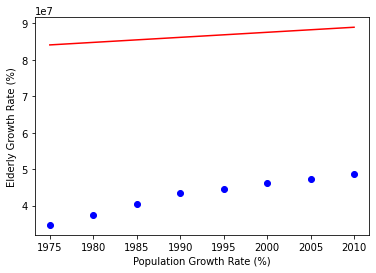

In [22]:
plt.plot(X_train, Y_train, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Growth Rate (%)')
plt.show()

In [23]:
value = a*np.array([[2017],[2018],[2019],[2020],[2021]])+b
value

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[89935760.],
       [90074380.],
       [90213010.],
       [90351660.],
       [90490290.]], dtype=float32)>

In [24]:
# 예측(2020) vs 차이(선형회귀/딥러닝회귀)

In [25]:
# 선형회귀
lr.predict([[2020]])

array([53603274.4523809])

In [26]:
# 딥러닝회귀
value[[3]]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([90351660.], dtype=float32)>